In [ ]:
! export CUDA_VISIBLE_DEVICES=0 &&  python ../main.py --data /data/14_3d --results /results/egd_results/fold-2  --resume_training  --ckpt_path /results/egd_results/fold-2/checkpoints/ --deep_supervision --depth 6 --filters 64 96 128 192 256 384 512 --min_fmap 2 --scheduler --learning_rate 0.0003 --epochs 150 --nfolds 3 --fold 2 --amp --gpus 1 --task 14 --save_ckpt

In [11]:
!cd ../ && export CUDA_VISIBLE_DEVICES=1 && python main.py --exec_mode predict --task 14 --brats --data /data/14_3d --dim 3 --fold 2 --nfolds 3 --ckpt_path /home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/results/3_fold_brats_2021/fold-2/checkpoints/epoch=136-dice_mean=90.66.ckpt --results /results/erasmus_infer/fold-2_brats --amp --tta --save_preds

Global seed set to 1
0 training, 0 validation, 374 test examples
Filters: [64, 96, 128, 192, 256, 384, 512],
Kernels: [[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3]]
Strides: [[1, 1, 1], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2]]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
Testing: 100%|████████████████████████████████| 374/374 [52:50<00:00,  8.48s/it]
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


In [10]:
!cd /results/erasmus_infer && mkdir fold-2_brats

In [5]:
!cd /home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/results/3_fold_brats_2021/fold-2/checkpoints/ && ls

'epoch=111-dice_mean=90.69.ckpt'  'epoch=34-dice_mean=89.24.ckpt'
'epoch=113-dice_mean=90.69.ckpt'  'epoch=39-dice_mean=89.47.ckpt'
'epoch=116-dice_mean=90.62.ckpt'  'epoch=40-dice_mean=89.69.ckpt'
'epoch=120-dice_mean=90.63.ckpt'  'epoch=43-dice_mean=87.94.ckpt'
'epoch=121-dice_mean=90.77.ckpt'  'epoch=98-dice_mean=90.80.ckpt'
'epoch=136-dice_mean=90.66.ckpt'   last.ckpt
'epoch=30-dice_mean=89.44.ckpt'


In [8]:
from scipy.ndimage import measurements
def to_lbl(pred):
    c1, c2 = pred[0] > 0.5, pred[1] > 0.5
    pred = (c1 > 0).astype(np.uint8)
#     pred[(c2 == False) * (c1 == True)] = 2
#     pred[(c3 == True) * (c1 == True)] = 4

#     components, n = measurements.label(pred == 4)
#     for et_idx in range(1, n + 1):
#         _, counts = np.unique(pred[components == et_idx], return_counts=True)
#         if 1 < counts[0] and counts[0] < 8 and np.mean(enh[components == et_idx]) < 0.9:
#             pred[components == et_idx] = 1

#     et = pred == 4
#     if 0 < et.sum() and et.sum() < 73 and np.mean(enh[et]) < 0.9:
#         pred[et] = 1
    pred = np.transpose(pred, (2, 1, 0)).astype(np.uint8)
    return pred

EGD-0001
(197, 233)
(197, 233)
[0. 1.]
[0 1]


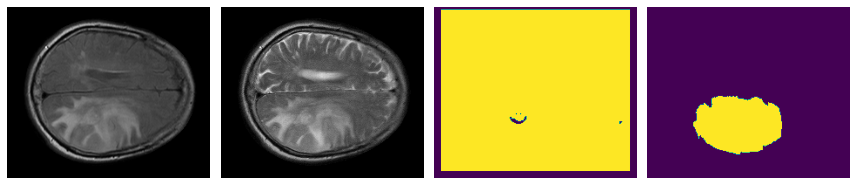

EGD-0004
(197, 233)
(197, 233)
[0. 1.]
[0 1]


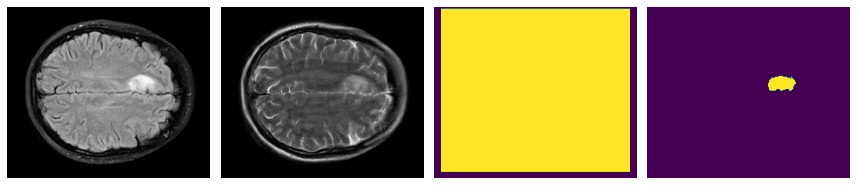

EGD-0006
(197, 233)
(197, 233)
[0. 1.]
[0 1]


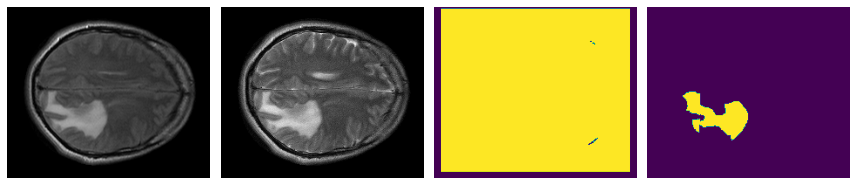

EGD-0009
(197, 233)
(197, 233)
[0. 1.]
[0 1]


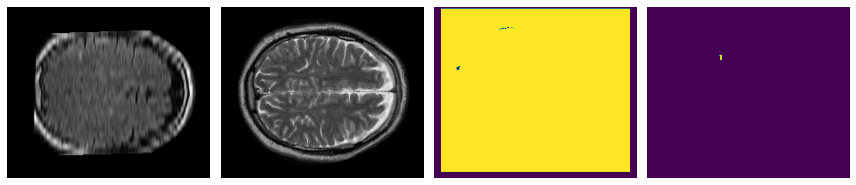

EGD-0014
(197, 233)
(197, 233)
[0. 1.]
[0 1]


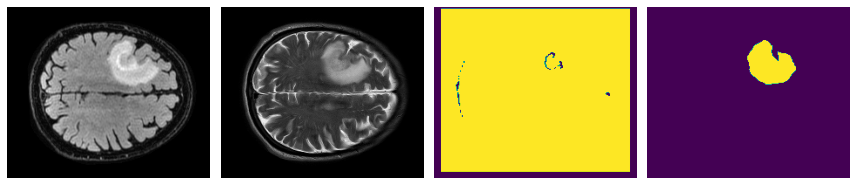

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob

n, z = 5, 107
data = sorted(glob("/results/erasmus_infer/fold-0_brats/predictions_epoch=135-dice_mean=90_62_task=11_fold=0_tta/*.npy"))
for i in range(n):
    fname = data[i].split("/")[-1].split(".")[0]
    print(fname)
    img = nib.load(f"/data/EGD_train/images/{fname}.nii.gz").get_fdata().astype(np.float32)
    label = nib.load(f"/data/EGD_train/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)[:, :, z]
    pred = np.load(data[i])
#     pred = to_lbl(pred)[:, :, z]
    pred = np.round(pred, 0).transpose(3,2,1,0)[:, :, z, 0]
    print(label.shape), print(pred.shape)
    print(np.unique(pred)), print(np.unique(label))
    imgs = [img[:, :, z, i] for i in [0, 3]] + [pred] + [label]    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 12))
    for i in range(4):
        if i < 2:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i]);
        ax[i].axis('off')  
    plt.tight_layout()            
    plt.show()